In [23]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

def linear_function(X, a, b):
    return a * X + b

In [24]:
def sigma_Bz(x,m,b,sigma_x,sigma_m,sigma_b):
    return np.sqrt(m**2*sigma_x**2 + sigma_b**2 + sigma_m**2*x**2)

def sigma_RH(w,m,B,sigma_m,sigma_B):
    return w*np.sqrt( (B**2*sigma_m**2 + m**2*sigma_B**2)/(B**4) )

In [25]:
Ib = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Bzb = [0, 21.6, 39.8, 61.2, 81.6, 103.7, 124.6, 145.6, 168.4, 188.2]

In [26]:
popt, pcov = curve_fit(linear_function, Ib, Bzb)

slope = popt[0]
intercept = popt[1]
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

slope, intercept, slope_std_err, intercept_std_err

(209.86060655682022,
 -0.9672730400130842,
 1.2299893420504322,
 0.6566346158972638)

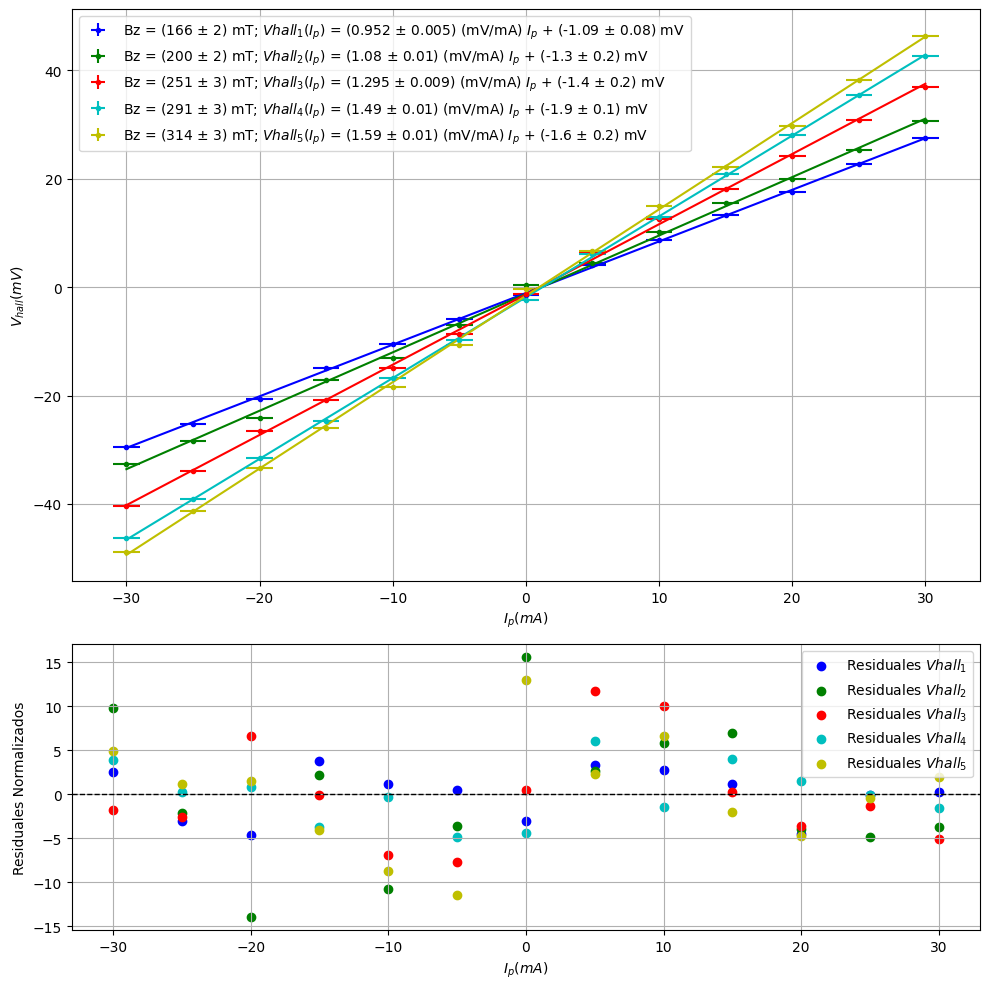

In [28]:
#ACT 2.1
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

Ip1 = np.array([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
sigma_Ip1 = np.array([1]*len(Ip1))

#Datos p-Ge

Vhall1 = -np.array([29.4, 25.2, 20.6, 15, 10.5, 5.8, 1.4, -4, -8.7, -13.3, -17.5, -22.7, -27.5]) #0.8 A, 166.92 mT
Vhall2 = -np.array([32.6, 28.4, 24.2, 17.2, 13.1, 7, -0.3, -4.4, -10.1, -15.6, -19.9, -25.2, -30.7]) #0.96 A, 200.5 mT
Vhall3 = -np.array([40.4, 34, 26.6, 20.8, 15, 8.6, 1.3, -6.3, -12.6, -18.1, -24.2, -30.9, -37]) #1.2 A, 250.86 mT
Vhall4 = -np.array([46.2, 39.1, 31.6, 24.6, 16.8, 9.8, 2.3, -6.2, -12.9, -20.9, -28.1, -35.4, -42.7]) #1.39 A, 290.74 mT
Vhall5 = -np.array([48.9, 41.3, 33.3, 25.9, 18.4, 10.7, 0.3, -6.6, -15, -22.1, -29.8, -38.2, -46.4]) #1.5 A, 313.82 mT

sigma_Vhall = np.array([0.1]*len(Vhall1))

popt1, pcov1 = curve_fit(linear_function, Ip1, Vhall1)
popt2, pcov2 = curve_fit(linear_function, Ip1, Vhall2)
popt3, pcov3 = curve_fit(linear_function, Ip1, Vhall3)
popt4, pcov4 = curve_fit(linear_function, Ip1, Vhall4)
popt5, pcov5 = curve_fit(linear_function, Ip1, Vhall5)

slope1 = popt1[0]
intercept1 = popt1[1]
slope_std_err1 = np.sqrt(pcov1[0, 0])
intercept_std_err1 = np.sqrt(pcov1[1, 1])

slope2 = popt2[0]
intercept2 = popt2[1]
slope_std_err2 = np.sqrt(pcov2[0, 0])
intercept_std_err2 = np.sqrt(pcov2[1, 1])

slope3 = popt3[0]
intercept3 = popt3[1]
slope_std_err3 = np.sqrt(pcov3[0, 0])
intercept_std_err3 = np.sqrt(pcov3[1, 1])

slope4 = popt4[0]
intercept4 = popt4[1]
slope_std_err4 = np.sqrt(pcov4[0, 0])
intercept_std_err4 = np.sqrt(pcov4[1, 1])


slope5 = popt5[0]
intercept5 = popt5[1]
slope_std_err5 = np.sqrt(pcov5[0, 0])
intercept_std_err5 = np.sqrt(pcov5[1, 1])

ax[0].errorbar(Ip1, Vhall1, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "b",
             label=f'Bz = (166 ± 2) mT; $Vhall_{1}(I_p)$ = ({slope1:.3f} ± {slope_std_err1:.3f}) (mV/mA) $I_p$ + ({intercept1:.2f} ± {intercept_std_err1:.2f}) mV')
ax[0].errorbar(Ip1, Vhall2, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "g",
             label=f'Bz = (200 ± 2) mT; $Vhall_{2}(I_p)$ = ({slope2:.2f} ± {slope_std_err2:.2f}) (mV/mA) $I_p$ + ({intercept2:.1f} ± {intercept_std_err2:.1f}) mV')
ax[0].errorbar(Ip1, Vhall3, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "r",
             label=f'Bz = (251 ± 3) mT; $Vhall_{3}(I_p)$ = ({slope3:.3f} ± {slope_std_err3:.3f}) (mV/mA) $I_p$ + ({intercept3:.1f} ± {intercept_std_err3:.1f}) mV')
ax[0].errorbar(Ip1, Vhall4, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "c",
             label=f'Bz = (291 ± 3) mT; $Vhall_{4}(I_p)$ = ({slope4:.2f} ± {slope_std_err4:.2f}) (mV/mA) $I_p$ + ({intercept4:.1f} ± {intercept_std_err4:.1f}) mV')
ax[0].errorbar(Ip1, Vhall5, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "y",
             label=f'Bz = (314 ± 3) mT; $Vhall_{5}(I_p)$ = ({slope5:.2f} ± {slope_std_err5:.2f}) (mV/mA) $I_p$ + ({intercept5:.1f} ± {intercept_std_err5:.1f}) mV')

ax[0].plot(Ip1, linear_function(Ip1,*popt1), color="b")
ax[0].plot(Ip1, linear_function(Ip1,*popt2), color= "g")
ax[0].plot(Ip1, linear_function(Ip1,*popt3), color = "r")
ax[0].plot(Ip1, linear_function(Ip1,*popt4), color = "c")
ax[0].plot(Ip1, linear_function(Ip1,*popt5), color = "y")

ax[0].set_xlabel('$I_p (mA)$')
ax[0].set_ylabel('$V_{hall} (mV)$')
ax[0].legend(loc='upper left')


residuals1 = (Vhall1 - linear_function(Ip1, *popt1))/sigma_Vhall
residuals2 = (Vhall2 - linear_function(Ip1, *popt2))/sigma_Vhall
residuals3 = (Vhall3 - linear_function(Ip1, *popt3))/sigma_Vhall
residuals4 = (Vhall4 - linear_function(Ip1, *popt4))/sigma_Vhall
residuals5 = (Vhall5 - linear_function(Ip1, *popt5))/sigma_Vhall

ax[1].scatter(Ip1, residuals1, alpha=1, label='Residuales $Vhall_1$', color = "b")
ax[1].scatter(Ip1, residuals2, alpha=1, label='Residuales $Vhall_2$', color = "g")
ax[1].scatter(Ip1, residuals3, alpha=1, label='Residuales $Vhall_3$', color = "r")
ax[1].scatter(Ip1, residuals4, alpha=1, label='Residuales $Vhall_4$', color = "c")
ax[1].scatter(Ip1, residuals5, alpha=1, label='Residuales $Vhall_5$', color = "y")


ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$I_p (mA)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='upper right')

ax[0].grid(True)
ax[1].grid(True)

plt.tight_layout()
plt.show()

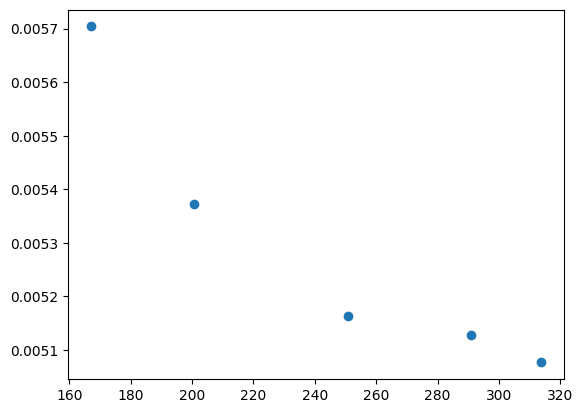

In [41]:
B1 = linear_function(0.8,*popt)
B2 = linear_function(0.96,*popt)
B3 = linear_function(1.2,*popt)
B4 = linear_function(1.39,*popt)
B5 = linear_function(1.5,*popt)



sigma_B1 = sigma_Bz(0.8,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B2 = sigma_Bz(0.96,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B3 = sigma_Bz(1.2,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B4 = sigma_Bz(1.39,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B5 = sigma_Bz(1.5,slope,intercept,0.01,slope_std_err, intercept_std_err)

RH1 = slope1*1e-3/(B1*1e-3)
RH2 = slope2*1e-3/(B2*1e-3)
RH3 = slope3*1e-3/(B3*1e-3)
RH4 = slope4*1e-3/(B4*1e-3)
RH5 = slope5*1e-3/(B5*1e-3)

sigma_RH1 = sigma_RH(1e-3,slope1,B1*1e-3,slope_std_err1,sigma_B1*1e-3)
sigma_RH2 = sigma_RH(1e-3,slope2,B2*1e-3,slope_std_err2,sigma_B2*1e-3)
sigma_RH3 = sigma_RH(1e-3,slope3,B3*1e-3,slope_std_err3,sigma_B3*1e-3)
sigma_RH4 = sigma_RH(1e-3,slope4,B4*1e-3,slope_std_err4,sigma_B4*1e-3)
sigma_RH5 = sigma_RH(1e-3,slope5,B5*1e-3,slope_std_err5,sigma_B5*1e-3)


plt.scatter(np.array([B1,B2,B3,B4,B5]),np.array([RH1,RH2,RH3,RH4,RH5]))

In [42]:
print(RH1, sigma_RH1)
print(RH2, sigma_RH2)
print(RH3, sigma_RH3)
print(RH4, sigma_RH4)
print(RH5, sigma_RH5)

0.005703816186740831 8.666620386461059e-05
0.00537340896949763 9.219853109963049e-05
0.005164100837969733 6.609837171821338e-05
0.00512751775378208 5.220958700095204e-05
0.005076694762329768 5.62677809054693e-05


In [43]:
print(B1, sigma_B1)
print(B2, sigma_B2)
print(B3, sigma_B3)
print(B4, sigma_B4)
print(B5, sigma_B5)

166.9212122054431 2.4090570058491965
200.4989092545343 2.4959128418912653
250.86545482817115 2.6483683057077276
290.738970073967 2.7853796636332615
313.8236367952172 2.8704150302245353


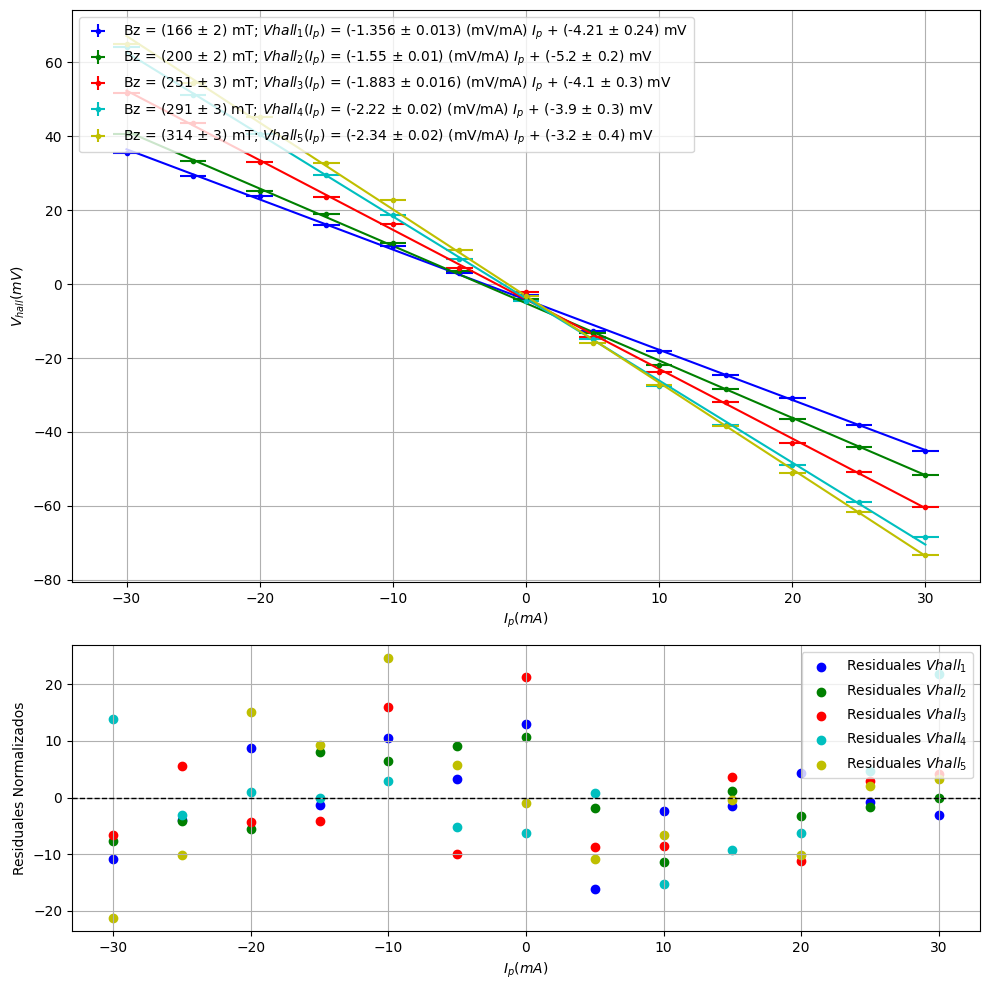

In [50]:
#ACT 2.1

fign, axn = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

#Datos nGe

Vhall1n = -np.array([-35.4, -29.3, -23.8, -16.0, -10.4, -2.9, 2.9, 12.6, 18.0, 24.7, 30.9, 38.2, 45.2]) #0.8 A, 166.92 mT
Vhall2n = -np.array([-40.6, -33.2, -25.3, -18.9, -11.0, -3.5, 4.1, 13.1, 21.8, 28.3, 36.5, 44.1, 51.7]) #0.96 A, 200.5 mT
Vhall3n = -np.array([-51.7, -43.5, -33.1, -23.7, -16.3, -4.3, 2.0, 14.4, 23.8, 32.0, 42.9, 50.9, 60.2]) #1.2 A, 250.86 mT
Vhall4n = -np.array([-64.1, -51.3, -40.6, -29.4, -18.6, -6.7, 4.5, 14.9, 27.6, 38.1, 48.9, 58.9, 68.3]) #1.39 A, 290.74 mT
Vhall5n = -np.array([-65.0, -54.4, -45.2, -32.9, -22.7, -9.1, 3.3, 16.0, 27.3, 38.4, 51.1, 61.6, 73.2]) #1.5 A, 313.82 mT

popt1n, pcov1n = curve_fit(linear_function, Ip1, Vhall1n)
popt2n, pcov2n = curve_fit(linear_function, Ip1, Vhall2n)
popt3n, pcov3n = curve_fit(linear_function, Ip1, Vhall3n)
popt4n, pcov4n = curve_fit(linear_function, Ip1, Vhall4n)
popt5n, pcov5n = curve_fit(linear_function, Ip1, Vhall5n)

slope1n = popt1n[0]
intercept1n = popt1n[1]
slope_std_err1n = np.sqrt(pcov1n[0, 0])
intercept_std_err1n = np.sqrt(pcov1n[1, 1])

slope2n = popt2n[0]
intercept2n = popt2n[1]
slope_std_err2n = np.sqrt(pcov2n[0, 0])
intercept_std_err2n = np.sqrt(pcov2n[1, 1])

slope3n = popt3n[0]
intercept3n = popt3n[1]
slope_std_err3n = np.sqrt(pcov3n[0, 0])
intercept_std_err3n = np.sqrt(pcov3n[1, 1])

slope4n = popt4n[0]
intercept4n = popt4n[1]
slope_std_err4n = np.sqrt(pcov4n[0, 0])
intercept_std_err4n = np.sqrt(pcov4n[1, 1])


slope5n = popt5n[0]
intercept5n = popt5n[1]
slope_std_err5n = np.sqrt(pcov5n[0, 0])
intercept_std_err5n = np.sqrt(pcov5n[1, 1])

axn[0].errorbar(Ip1, Vhall1n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "b",
             label=f'Bz = (166 ± 2) mT; $Vhall_{1}(I_p)$ = ({slope1n:.3f} ± {slope_std_err1n:.3f}) (mV/mA) $I_p$ + ({intercept1n:.2f} ± {intercept_std_err1n:.2f}) mV')
axn[0].errorbar(Ip1, Vhall2n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "g",
             label=f'Bz = (200 ± 2) mT; $Vhall_{2}(I_p)$ = ({slope2n:.2f} ± {slope_std_err2n:.2f}) (mV/mA) $I_p$ + ({intercept2n:.1f} ± {intercept_std_err2n:.1f}) mV')
axn[0].errorbar(Ip1, Vhall3n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "r",
             label=f'Bz = (251 ± 3) mT; $Vhall_{3}(I_p)$ = ({slope3n:.3f} ± {slope_std_err3n:.3f}) (mV/mA) $I_p$ + ({intercept3n:.1f} ± {intercept_std_err3n:.1f}) mV')
axn[0].errorbar(Ip1, Vhall4n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "c",
             label=f'Bz = (291 ± 3) mT; $Vhall_{4}(I_p)$ = ({slope4n:.2f} ± {slope_std_err4n:.2f}) (mV/mA) $I_p$ + ({intercept4n:.1f} ± {intercept_std_err4n:.1f}) mV')
axn[0].errorbar(Ip1, Vhall5n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "y",
             label=f'Bz = (314 ± 3) mT; $Vhall_{5}(I_p)$ = ({slope5n:.2f} ± {slope_std_err5n:.2f}) (mV/mA) $I_p$ + ({intercept5n:.1f} ± {intercept_std_err5n:.1f}) mV')

axn[0].plot(Ip1, linear_function(Ip1,*popt1n), color="b")
axn[0].plot(Ip1, linear_function(Ip1,*popt2n), color= "g")
axn[0].plot(Ip1, linear_function(Ip1,*popt3n), color = "r")
axn[0].plot(Ip1, linear_function(Ip1,*popt4n), color = "c")
axn[0].plot(Ip1, linear_function(Ip1,*popt5n), color = "y")

axn[0].set_xlabel('$I_p (mA)$')
axn[0].set_ylabel('$V_{hall} (mV)$')
axn[0].legend(loc='upper left')


residuals1n = (Vhall1n - linear_function(Ip1, *popt1n))/sigma_Vhall
residuals2n = (Vhall2n - linear_function(Ip1, *popt2n))/sigma_Vhall
residuals3n = (Vhall3n - linear_function(Ip1, *popt3n))/sigma_Vhall
residuals4n = (Vhall4n - linear_function(Ip1, *popt4n))/sigma_Vhall
residuals5n = (Vhall5n - linear_function(Ip1, *popt5n))/sigma_Vhall

axn[1].scatter(Ip1, residuals1n, alpha=1, label='Residuales $Vhall_1$', color = "b")
axn[1].scatter(Ip1, residuals2n, alpha=1, label='Residuales $Vhall_2$', color = "g")
axn[1].scatter(Ip1, residuals3n, alpha=1, label='Residuales $Vhall_3$', color = "r")
axn[1].scatter(Ip1, residuals4n, alpha=1, label='Residuales $Vhall_4$', color = "c")
axn[1].scatter(Ip1, residuals5n, alpha=1, label='Residuales $Vhall_5$', color = "y")


axn[1].axhline(0, color='black', linewidth=1, linestyle='--')
axn[1].set_xlabel('$I_p (mA)$')
axn[1].set_ylabel('Residuales Normalizados')
axn[1].legend(loc='upper right')

axn[0].grid(True)
axn[1].grid(True)

plt.tight_layout()
plt.show()

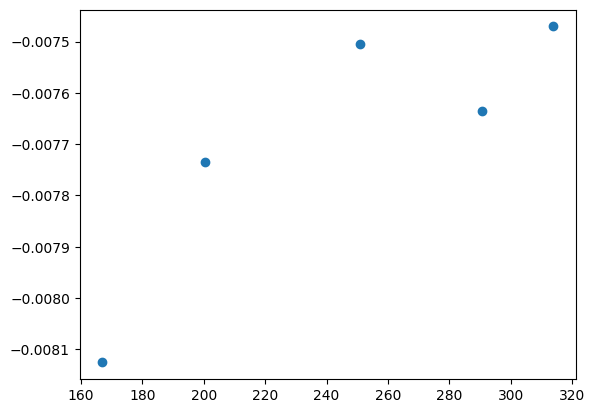

In [51]:
RH1n = slope1n*1e-3/(B1*1e-3)
RH2n = slope2n*1e-3/(B2*1e-3)
RH3n = slope3n*1e-3/(B3*1e-3)
RH4n = slope4n*1e-3/(B4*1e-3)
RH5n = slope5n*1e-3/(B5*1e-3)

sigma_RH1n = sigma_RH(1e-3,slope1n,B1*1e-3,slope_std_err1,sigma_B1*1e-3)
sigma_RH2n = sigma_RH(1e-3,slope2n,B2*1e-3,slope_std_err2,sigma_B2*1e-3)
sigma_RH3n = sigma_RH(1e-3,slope3n,B3*1e-3,slope_std_err3,sigma_B3*1e-3)
sigma_RH4n = sigma_RH(1e-3,slope4n,B4*1e-3,slope_std_err4,sigma_B4*1e-3)
sigma_RH5n = sigma_RH(1e-3,slope5n,B5*1e-3,slope_std_err5,sigma_B5*1e-3)


plt.scatter(np.array([B1,B2,B3,B4,B5]),np.array([RH1n,RH2n,RH3n,RH4n,RH5n]))

In [52]:
print(RH1n, sigma_RH1n)
print(RH2n, sigma_RH2n)
print(RH3n, sigma_RH3n)
print(RH4n, sigma_RH4n)
print(RH5n, sigma_RH5n)

-0.008125831393492221 0.0001395793624515872
-0.007735100039358474 0.00010964252651339283
-0.007505446073286907 0.00010082617314804225
-0.0076345813877002604 8.952727248981515e-05
-0.00747042392415834 9.107470980569979e-05


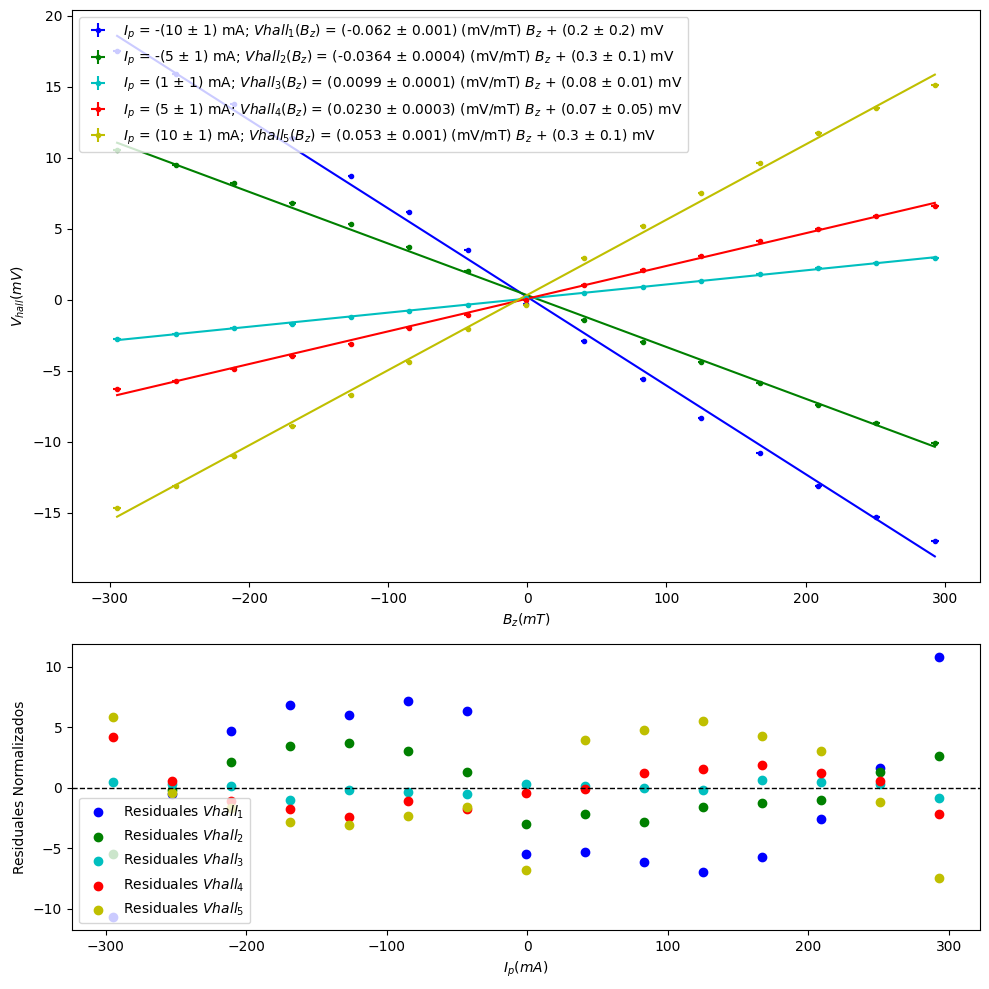

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})
Ip_used = np.array([-10,-5,0,5,10])

Ib1 = np.array([-1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4])
Bz1 = linear_function(Ib1,*popt)

sigma_Ib1 = np.array([0.01]*len(Ib1))
sigma_Bz1 = sigma_Bz(Ib1,slope,intercept,sigma_Ib1,slope_std_err,intercept_std_err)


# Datos p-Ge

Vhall12 = -np.array([-17.5, -15.9, -13.8, -11.4, -8.7, -6.2, -3.5, 0.3, 2.9, 5.6, 8.3, 10.8, 13.1, 15.3, 17])
Vhall22 = -np.array([-10.5, -9.5, -8.2, -6.8, -5.3, -3.7, -2, -0.04, 1.4, 3, 4.4, 5.9, 7.4, 8.7, 10.1])
Vhall32 = -np.array([2.8, 2.4, 2.0, 1.7, 1.2, 0.8, 0.4, -0.1, -0.5, -0.9, -1.3, -1.8, -2.2, -2.6, -2.9])
Vhall42 = -np.array([6.3, 5.7, 4.9, 4.0, 3.1, 2.0, 1.1, 0.0, -1.0, -2.1, -3.1, -4.1, -5.0, -5.9, -6.6])
Vhall52 = -np.array([14.7, 13.1, 11.0, 8.9, 6.7, 4.4, 2.1, 0.4, -2.9, -5.2, -7.5, -9.6, -11.7, -13.5, -15.1])

sigma_Vhall1 = np.array([0.1]*len(Vhall12))

popt12, pcov12 = curve_fit(linear_function, Bz1, Vhall12)
popt22, pcov22 = curve_fit(linear_function, Bz1, Vhall22)
popt32, pcov32 = curve_fit(linear_function, Bz1, Vhall32)
popt42, pcov42 = curve_fit(linear_function, Bz1, Vhall42)
popt52, pcov52 = curve_fit(linear_function, Bz1, Vhall52)

slope12 = popt12[0]
intercept12 = popt12[1]
slope_std_err12 = np.sqrt(pcov12[0, 0])
intercept_std_err12 = np.sqrt(pcov12[1, 1])

slope22 = popt22[0]
intercept22 = popt22[1]
slope_std_err22 = np.sqrt(pcov22[0, 0])
intercept_std_err22 = np.sqrt(pcov22[1, 1])

slope32 = popt32[0]
intercept32 = popt32[1]
slope_std_err32 = np.sqrt(pcov32[0, 0])
intercept_std_err32 = np.sqrt(pcov32[1, 1])

slope42 = popt42[0]
intercept42 = popt42[1]
slope_std_err42 = np.sqrt(pcov42[0, 0])
intercept_std_err42 = np.sqrt(pcov42[1, 1])


slope52 = popt52[0]
intercept52 = popt52[1]
slope_std_err52 = np.sqrt(pcov52[0, 0])
intercept_std_err52 = np.sqrt(pcov52[1, 1])

ax1.errorbar(Bz1, Vhall12, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "b",
             label=f'$I_p$ = -(10 ± 1) mA; $Vhall_{1}(B_z)$ = ({slope12:.3f} ± {slope_std_err12:.3f}) (mV/mT) $B_z$ + ({intercept12:.1f} ± {intercept_std_err12:.1f}) mV')
ax1.errorbar(Bz1, Vhall22, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "g",
             label=f'$I_p$ = -(5 ± 1) mA; $Vhall_{2}(B_z)$ = ({slope22:.4f} ± {slope_std_err22:.4f}) (mV/mT) $B_z$ + ({intercept22:.1f} ± {intercept_std_err22:.1f}) mV')
ax1.errorbar(Bz1, Vhall32, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "c",
             label=f'$I_p$ = (1 ± 1) mA; $Vhall_{3}(B_z)$ = ({slope32:.4f} ± {slope_std_err32:.4f}) (mV/mT) $B_z$ + ({intercept32:.2f} ± {intercept_std_err32:.2f}) mV')
ax1.errorbar(Bz1, Vhall42, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "r",
             label=f'$I_p$ = (5 ± 1) mA; $Vhall_{4}(B_z)$ = ({slope42:.4f} ± {slope_std_err42:.4f}) (mV/mT) $B_z$ + ({intercept42:.2f} ± {intercept_std_err42:.2f}) mV')
ax1.errorbar(Bz1, Vhall52, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "y",
             label=f'$I_p$ = (10 ± 1) mA; $Vhall_{5}(B_z)$ = ({slope52:.3f} ± {slope_std_err52:.3f}) (mV/mT) $B_z$ + ({intercept52:.1f} ± {intercept_std_err52:.1f}) mV')

ax1.plot(Bz1, linear_function(Bz1,*popt12), color = "b")
ax1.plot(Bz1, linear_function(Bz1,*popt22), color = "g")
ax1.plot(Bz1, linear_function(Bz1,*popt32), color = "c")
ax1.plot(Bz1, linear_function(Bz1,*popt42), color = "r")
ax1.plot(Bz1, linear_function(Bz1,*popt52), color = "y")

ax1.set_xlabel('$B_z (mT)$')
ax1.set_ylabel('$V_{hall} (mV)$')
ax1.legend(loc='upper left')


residuals12 = (Vhall12 - linear_function(Bz1, *popt12))/sigma_Vhall1
residuals22 = (Vhall22 - linear_function(Bz1, *popt22))/sigma_Vhall1
residuals32 = (Vhall32 - linear_function(Bz1, *popt32))/sigma_Vhall1
residuals42 = (Vhall42 - linear_function(Bz1, *popt42))/sigma_Vhall1
residuals52 = (Vhall52 - linear_function(Bz1, *popt52))/sigma_Vhall1

ax2.scatter(Bz1, residuals12, alpha=1, label='Residuales $Vhall_1$', color = "b")
ax2.scatter(Bz1, residuals22, alpha=1, label='Residuales $Vhall_2$', color = "g")
ax2.scatter(Bz1, residuals32, alpha=1, label='Residuales $Vhall_3$', color = "c")
ax2.scatter(Bz1, residuals42, alpha=1, label='Residuales $Vhall_4$', color = "r")
ax2.scatter(Bz1, residuals52, alpha=1, label='Residuales $Vhall_5$', color = "y")


ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('$I_p (mA)$')
ax2.set_ylabel('Residuales Normalizados')
ax2.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [47]:
RH12 = slope12*1e-3/(-10*1e-3)
RH22 = slope22*1e-3/(-5*1e-3)
RH32 = slope32*1e-3/(1*1e-3)
RH42 = slope42*1e-3/(5*1e-3)
RH52 = slope52*1e-3/(10*1e-3)

sigma_RH12 = sigma_RH(1e-3,slope12,-10*1e-3,slope_std_err1,1*1e-3)
sigma_RH22 = sigma_RH(1e-3,slope22,-5*1e-3,slope_std_err2,1*1e-3)
sigma_RH32 = sigma_RH(1e-3,slope32,1*1e-3,slope_std_err3,1*1e-3)
sigma_RH42 = sigma_RH(1e-3,slope42,5*1e-3,slope_std_err4,1*1e-3)
sigma_RH52 = sigma_RH(1e-3,slope52,10*1e-3,slope_std_err5,1*1e-3)

print(RH12, sigma_RH12)
print(RH22, sigma_RH22)
print(RH32, sigma_RH32)
print(RH42, sigma_RH42)
print(RH52, sigma_RH52)

0.006237133270000947 0.0007705146080387263
0.007285448167694567 0.0029320920016711275
0.009930060747343851 0.013657126201968886
0.004606799389851443 0.0013806911838249408
0.0052968833035433914 0.0011292384652156302


In [9]:
#ACT 2.2

# Datos n-Ge

In [12]:
Bz1 = np.array([20.0187,  41.0047,  61.9907,  82.9767, 103.9627,
       124.9487, 145.9347, 166.9207, 187.9067, 208.8927, 229.8787,
       250.8647, 271.8507, 292.8367, 313.8227])

coef_values1 = np.array([0, 0.001012146, 0.002024291, 0.003036437, 0.005060729,
               0.006072874, 0.008097166, 0.011133603, 0.013157895, 0.016194332,
               0.019230769, 0.022267206, 0.025303644, 0.028340081, 0.031376518])

In [30]:
def PowerLaw(X, a, b, c):
    return a*X**b+ c

In [31]:
poptp, pcovp = curve_fit(PowerLaw, Bz1, coef_values1)

In [32]:
poptp

array([ 2.28534134e-06,  1.66174152e+00, -3.30938927e-04])

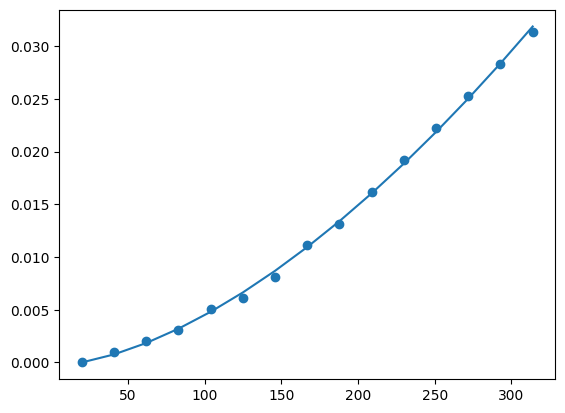

In [33]:
plt.scatter(Bz1,coef_values1)
plt.plot(Bz1, PowerLaw(Bz1,*poptp))